In [11]:
import numpy as np
from overcooked_ai_py.mdp.actions import Action, Direction
from overcooked_ai_py.agents.agent import Agent, AgentPair, StayAgent, RandomAgent
from overcooked_ai_py.agents.benchmarking import AgentEvaluator, LayoutGenerator

Agent evaluator using the benchmarking

In [3]:
mdp_gen_params = {"layout_name": 'cramped_room'}
mdp_fn = LayoutGenerator.mdp_gen_fn_from_dict(mdp_gen_params)
env_params = {"horizon": 1000}
agent_eval = AgentEvaluator(env_params=env_params, mdp_fn=mdp_fn)

In [4]:
trajectory_random_pair= agent_eval.evaluate_random_pair(num_games=5)
print("Random pair rewards", trajectory_random_pair["ep_returns"])

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1000.00; : 100%|█| 5/5 [00:04<00:00, 

Random pair rewards [0 0 0 0 0]


Generating own layout instead of one in the /data/layouts/*.layout format

In [5]:
mdp_gen_params = {"inner_shape": (7,7),
                 "prop_empty": 0.2, #proportion of empty space
                 "prop_feats": 0.8, #proportion of occupied space or counters with features in them
                 "display": True,
                 "start_all_orders":
                 [{"ingredients":["onion", "onion", "onion"]},
                 {"ingredients":["onion", "onion"]},
                 {"ingredients":["onion"]}],
                 "recipie_values": [20, 9, 4],
                 "recipie_times":[20,15,10]
                 }

env_params= {"horizon": 500}

#need to check why the outer_shape is not in the original mpd_gen_params 
mdp_fn = LayoutGenerator.mdp_gen_fn_from_dict(mdp_gen_params, outer_shape= (7,7))
agent_eval = AgentEvaluator(env_params=env_params, mdp_fn=mdp_fn)

trajectory_random_pair= agent_eval.evaluate_random_pair(num_games=10)
print("Random pair rewards", trajectory_random_pair["ep_returns"])

def pretty_grid(grid):
    return "\n".join("".join(line) for line in grid)

print("\n Generated grid: \n" + pretty_grid(trajectory_random_pair["mdp_params"][0]["terrain"]))


Generated layout
X X D O X X X 
X P     D X X 
X X O   P X X 
X X S     O X 
X X     S X X 
X X X D X X X 
X X X X X X X 

Generated layout
X X X P X X X 
X D     S S X 
P   O       S 
S   D   X   P 
D       O D X 
O   D O X X X 
X X X X X X X 

Generated layout
X X P X S O X 
X P         O 
O           D 
D           O 
X     P     P 
O   D X D   S 
X P X X X X X 



  0%|                                                    | 0/10 [00:00<?, ?it/s]

Computing MotionPlanner to be saved in /home/riselab/PycharmProjects/overcooked_ai/src/overcooked_ai_py/data/planners/XXPXSOX|XP    O|O     D|D1    O|X  P  P|O DXD2S|XPXXXXX_mp.pkl
It took 3.182252883911133 seconds to create mp


Avg rew: 6.00 (std: 9.17, se: 2.90); avg len: 500.00; : 100%|█| 10/10 [00:08<00:

Random pair rewards [20  0  0  0 20 20  0  0  0  0]

 Generated grid: 
XXPXSOX
XP    O
O     D
D     O
X  P  P
O DXD S
XPXXXXX


Custom agent development

In [8]:
class CustomRandomAgent(Agent):
    """An agent randomly picks motion actions.
    Note: Does not perform interat actions, unless specified"""
    
    def action(self, state):
        action_probs= np.zeros(Action.NUM_ACTIONS)
        legal_actions = Action.ALL_ACTIONS
        legal_actions_indices = np.array([Action.ACTION_TO_INDEX[motion_a] for motion_a in legal_actions])
        action_probs[legal_actions_indices] = 1/len(legal_actions)
        return Action.sample(action_probs), {"action_probs": action_probs}
    
    def actions(self, states, agent_indices):
        return(self.action(state) for state in states)

    
agent_pair = AgentPair(CustomRandomAgent(), CustomRandomAgent())
mdp_gen_params = {"layout_name": 'cramped_room'}
mdp_fn = LayoutGenerator.mdp_gen_fn_from_dict(mdp_gen_params)
env_params = {"horizon": 1000}
agent_eval = AgentEvaluator(env_params=env_params, mdp_fn=mdp_fn)

#check the choice of the agent pair
trajectory_custom_random_pair= agent_eval.evaluate_agent_pair(agent_pair, num_games=10)
print("Custom random pair rewards", trajectory_custom_random_pair["ep_returns"])      
        

Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1000.00; : 100%|█| 10/10 [00:08<00

Custom random pair rewards [0 0 0 0 0 0 0 0 0 0]


Single player variant

In [12]:
agent_pair=AgentPair(RandomAgent(all_actions=True), StayAgent())
mdp_gen_params_single = {"layout_name":'five_by_five'}
mdp_fn_single= LayoutGenerator.mdp_gen_fn_from_dict(mdp_gen_params_single)
agent_eval_single= AgentEvaluator(env_params= env_params, mdp_fn=mdp_fn_single)

trajectory_single_check = agent_eval_single.evaluate_agent_pair(agent_pair, num_games= 10)
print("Single agent reward", trajectory_single_check["ep_returns"]) 


  0%|                                                    | 0/10 [00:00<?, ?it/s]

Computing MotionPlanner to be saved in /home/riselab/PycharmProjects/overcooked_ai/src/overcooked_ai_py/data/planners/five_by_five_mp.pkl
It took 0.2961246967315674 seconds to create mp


Avg rew: 0.00 (std: 0.00, se: 0.00); avg len: 1000.00; : 100%|█| 10/10 [00:06<00

Single agent reward [0 0 0 0 0 0 0 0 0 0]


In [17]:
from overcooked_ai_py.agents.benchmarking import AgentEvaluator
from overcooked_ai_py.agents.agent import AgentPair, FixedPlanAgent, GreedyHumanModel, RandomAgent, SampleAgent
from overcooked_ai_py.visualization.state_visualizer import StateVisualizer
ae = AgentEvaluator.from_layout_name({"layout_name": "cramped_room"}, {"horizon": 100})
trajs= ae.evaluate_human_model_pair()
ae.env

Avg rew: 40.00 (std: 0.00, se: 0.00); avg len: 100.00; : 100%|█| 1/1 [00:00<00:0


X       X       P       X       X       

O                       ↑1      O       

X       ↑0                      X       

X       D       X       S       X       


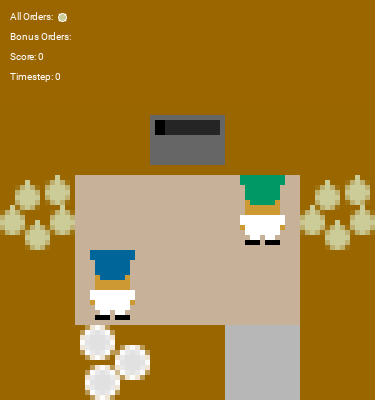

interactive(children=(IntSlider(value=0, description='timestep', max=99), Output()), _dom_classes=('widget-int…

In [18]:
action_probs = [[RandomAgent(all_actions= True).action(state)[1]["action_probs"]]*2 for state in trajs["ep_states"][0]]
StateVisualizer().display_rendered_trajectory(trajs, ipython_display= True)